Importing Libraries

In [222]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False

### Initial Setup

In [223]:
## Reading test and train dataset

train_df=pd.read_csv(r"..\Notebooks\Train_dataset.csv")
test_df=pd.read_csv(r"..\Notebooks\Test_dataset.csv")

In [224]:
train_df['Timestamp']=pd.to_datetime(train_df['Timestamp'])
train_df['Date']=pd.to_datetime(train_df['Date'])

# creating year data column
train_df['Year']= train_df['Date'].dt.year


train_df.head()

,obs_id,SiteId,Timestamp,Value,Temperature,Date,Holiday,hour,day_of_the_week,Month,Season,Year
0,2512063,40,2017-01-11 04:30:00+00:00,10879.083336,-4.0,2017-01-11,Working Day,4,2,1,Winder,2017
1,2512063,40,2017-01-11 04:30:00+00:00,10879.083336,-1.0,2017-01-11,Working Day,4,2,1,Winder,2017
2,1148116,40,2017-01-14 20:30:00+00:00,4001.425865,-2.0,2017-01-14,Working Day,20,5,1,Winder,2017
3,1148116,40,2017-01-14 20:30:00+00:00,4001.425865,-3.0,2017-01-14,Working Day,20,5,1,Winder,2017
4,7587273,40,2017-01-15 14:30:00+00:00,10088.216946,2.0,2017-01-15,Working Day,14,6,1,Winder,2017


In [225]:
# Converting Value Columns into kW (by deviding value by 1000)

train_df['Value_kW'] = train_df['Value'] / 1000

train_df=train_df.drop(columns=['Value'])

train_df.head()

,obs_id,SiteId,Timestamp,Temperature,Date,Holiday,hour,day_of_the_week,Month,Season,Year,Value_kW
0,2512063,40,2017-01-11 04:30:00+00:00,-4.0,2017-01-11,Working Day,4,2,1,Winder,2017,10.879083
1,2512063,40,2017-01-11 04:30:00+00:00,-1.0,2017-01-11,Working Day,4,2,1,Winder,2017,10.879083
2,1148116,40,2017-01-14 20:30:00+00:00,-2.0,2017-01-14,Working Day,20,5,1,Winder,2017,4.001426
3,1148116,40,2017-01-14 20:30:00+00:00,-3.0,2017-01-14,Working Day,20,5,1,Winder,2017,4.001426
4,7587273,40,2017-01-15 14:30:00+00:00,2.0,2017-01-15,Working Day,14,6,1,Winder,2017,10.088217


In [226]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413082 entries, 0 to 413081
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   obs_id           413082 non-null  int64              
 1   SiteId           413082 non-null  int64              
 2   Timestamp        413082 non-null  datetime64[ns, UTC]
 3   Temperature      413082 non-null  float64            
 4   Date             413082 non-null  datetime64[ns]     
 5   Holiday          413082 non-null  object             
 6   hour             413082 non-null  int64              
 7   day_of_the_week  413082 non-null  int64              
 8   Month            413082 non-null  int64              
 9   Season           413082 non-null  object             
 10  Year             413082 non-null  int32              
 11  Value_kW         413082 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), 

### Train Dataset

In [227]:
print("Rows :",train_df.shape[0])
print("Columns :",train_df.shape[1])
print("\nFeatures :\n",train_df.columns.tolist())
print("\nMissing Values :", train_df.isna().any())
print("\nUnique values :\n",train_df.nunique())

Rows : 413082
Columns : 12

Features :
 ['obs_id', 'SiteId', 'Timestamp', 'Temperature', 'Date', 'Holiday', 'hour', 'day_of_the_week', 'Month', 'Season', 'Year', 'Value_kW']

Missing Values : obs_id             False
SiteId             False
Timestamp          False
Temperature        False
Date               False
Holiday            False
hour               False
day_of_the_week    False
Month              False
Season             False
Year               False
Value_kW           False
dtype: bool

Unique values :
 obs_id             326985
SiteId                 28
Timestamp           79708
Temperature           350
Date                 1777
Holiday                39
hour                   24
day_of_the_week         7
Month                  12
Season                  4
Year                    5
Value_kW            99535
dtype: int64


In [228]:
train_df.describe()

,obs_id,SiteId,Temperature,Date,hour,day_of_the_week,Month,Year,Value_kW
count,4.130820e+05,413082.000000,413082.000000,413082,413082.000000,413082.000000,413082.000000,413082.000000,413082.000000
mean,3.928331e+06,16.936182,13.413503,2015-10-15 13:36:16.983746560,11.308447,2.995756,6.423231,2015.296648,25.035813
min,2.100000e+01,2.000000,-4.050000,2013-01-01 00:00:00,0.000000,0.000000,1.000000,2013.000000,0.000000
25%,1.964181e+06,6.000000,9.000000,2014-12-01 00:00:00,5.000000,1.000000,3.000000,2014.000000,5.370933
50%,3.921620e+06,9.000000,13.600000,2015-12-08 00:00:00,11.000000,3.000000,6.000000,2015.000000,19.673670
75%,5.896182e+06,25.000000,17.700000,2016-10-07 00:00:00,17.000000,5.000000,9.000000,2016.000000,34.979526
max,7.868941e+06,51.000000,30.750000,2017-11-13 00:00:00,23.000000,6.000000,12.000000,2017.000000,79.392415
std,2.271367e+06,14.140304,6.411035,NaN,7.012277,1.996895,3.412352,1.243849,22.346550


In [229]:
# Creating a copy 

train_df_non_indexed=train_df.copy()

In [230]:
total_values=train_df.groupby('SiteId')['Value_kW'].count()
total_values

SiteId
2     45590
3       525
5       299
6     76075
7       627
8     63132
9     48615
10     1284
12      422
16      726
19    45500
20     4333
22       12
23       76
25    33484
26     3903
29     1768
32      786
33    23446
38     1747
40    32011
41        3
44      118
46    13036
48       64
49     4479
50     9471
51     1550
Name: Value_kW, dtype: int64

In [231]:
new_df=train_df.loc[(train_df['SiteId']==6) &(train_df['Value_kW'] != 0), ['Value_kW','Timestamp']]
new_df

,Value_kW,Timestamp
10754,27.795247,2017-08-02 18:30:00+00:00
10755,21.124388,2017-08-03 06:00:00+00:00
10756,21.124388,2017-08-03 06:00:00+00:00
10757,37.801536,2017-08-03 07:30:00+00:00
10758,18.530165,2017-08-04 04:30:00+00:00
...,...,...
398584,18.530165,2017-08-01 22:30:00+00:00
398585,16.306545,2017-08-02 02:00:00+00:00
398586,17.047752,2017-08-02 04:00:00+00:00
398587,17.047752,2017-08-02 04:30:00+00:00


In [232]:

new_df = new_df.set_index('Timestamp').sort_index()

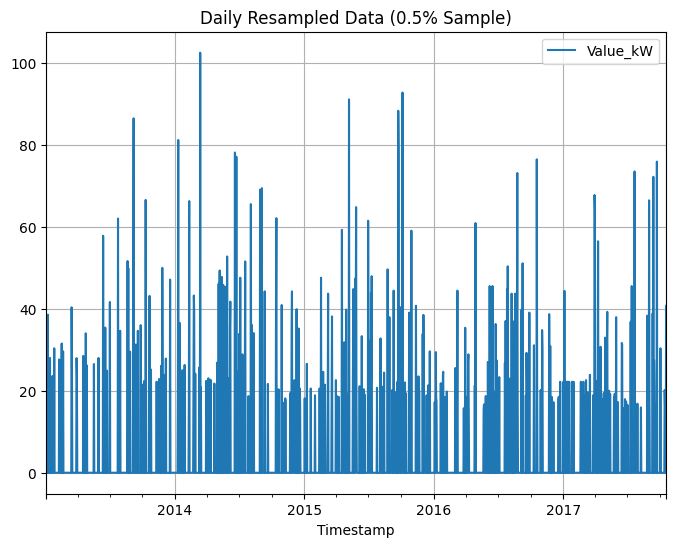

In [233]:
new_df.index = pd.to_datetime(new_df.index)

# Sample 0.5% of the data randomly
sampled_df = new_df.sample(frac=0.005, random_state=1)  # Set random_state for reproducibility

# Resample the sampled dataset into daily values
daily_df = sampled_df.resample('D').sum()

# Plot the resampled data
daily_df.plot(grid=True)
plt.title('Daily Resampled Data (0.5% Sample)')
plt.show()


In [234]:
year = 2015
month = 1  # Change this to the desired month number

# Filter the DataFrame for the specific year and month
monthly_values_2015 = daily_df[(daily_df['Year'] == year) & (daily_df['Month'] == month)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_values_2015.index, monthly_values_2015['Value_kW'], marker='o', linestyle='-')
plt.title(f'Energy Usage for {month:02d}/{year}')
plt.xlabel('Index')
plt.ylabel('Value (kW)')
plt.grid(True)
plt.show()


KeyError: 'Year'

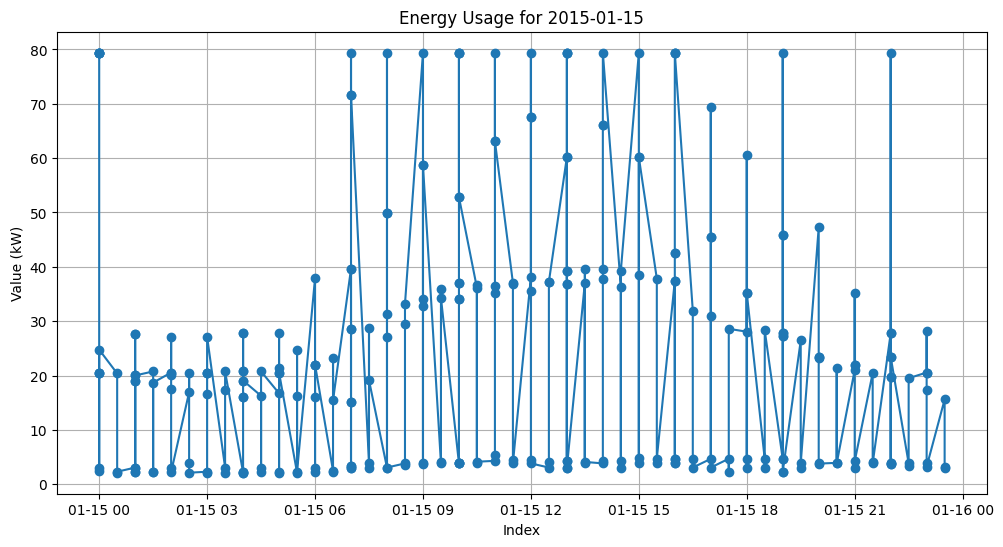

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame loading
# train_df = pd.read_csv('your_data.csv')  # Load your data if not already loaded

# Convert 'Date' column to datetime if it's not already
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Define the specific date for filtering
specific_date = '2015-01-15'  # Change this to the desired date in YYYY-MM-DD format

# Filter the DataFrame for the specific date
daily_data = train_df[train_df['Date'] == specific_date]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['Value_kW'], marker='o', linestyle='-')
plt.title(f'Energy Usage for {specific_date}')
plt.xlabel('Index')
plt.ylabel('Value (kW)')
plt.grid(True)
plt.show()
